# Evaluation per quantile level

In [1]:
from src.scoring_functions import compute_scores
from src.load_data import load_predictions
from config import *
from plotnine import *

In [2]:
MODEL_COLORS = {
    'Ensemble': '#009E73',
    'LightGBM': '#B30000',
    'LightGBM-NoCovariates': '#B30000',
    'LightGBM-NoCovid': '#B30000',
    'LightGBM-Oracle': '#B30000',
    'LightGBM-Skip': '#B30000',
    'LightGBM-Uncorrected': '#B30000',
    'TSMixer': '#E69F00',
    'TSMixer-NoCovariates': '#E69F00',
    'TSMixer-NoCovid': '#E69F00',
    'TSMixer-Oracle': '#E69F00',
    'TSMixer-Skip': '#E69F00',
    'TSMixer-Uncorrected': '#E69F00',
    'hhh4': '#3C4AAD',
    'hhh4-NoCovid': '#3C4AAD',
    'hhh4-Oracle': '#3C4AAD',
    'hhh4-Skip': '#3C4AAD',
    'hhh4-Uncorrected': '#3C4AAD',
    'Nowcast': '#56B4E9',
    'Historical': '#000000',
    'Persistence' : '#80471C',
}

In [3]:
MODEL_ORDER = ['Nowcast', 'Ensemble', 
               'LightGBM', 'LightGBM-NoCovariates', 'LightGBM-NoCovid', 'LightGBM-Oracle', 'LightGBM-Skip', 'LightGBM-Uncorrected',
               'TSMixer', 'TSMixer-NoCovariates', 'TSMixer-NoCovid', 'TSMixer-Oracle', 'TSMixer-Skip', 'TSMixer-Uncorrected',
               'hhh4', 'hhh4-NoCovid', 'hhh4-Oracle', 'hhh4-Skip', 'hhh4-Uncorrected', 'Persistence', 'Historical']

In [4]:
MAIN_MODELS = ['Ensemble', 'LightGBM', 'TSMixer', 'hhh4', 'Historical', 'Persistence']

In [5]:
df = load_predictions()

# Prepare scores

In [6]:
df_scores = compute_scores(df)

In [7]:
df_scores = df_scores[df_scores['type'] == 'quantile']

In [8]:
df_scores['level'] = df_scores['age_group'].map(lambda x: 'national' if x == '00+' else 'age')
df_scores['level'] = pd.Categorical(df_scores['level'], categories=['national', 'age'], ordered=True)

In [9]:
df_scores = df_scores[df_scores.model.isin(MAIN_MODELS)].copy()
model_order = [m for m in MODEL_ORDER if m in df_scores.model.unique()]
df_scores['model'] = pd.Categorical(df_scores['model'], categories=model_order, ordered=True) 

In [10]:
df_qs = df_scores.groupby(['level', 'model', 'quantile'], observed=True)['score'].mean().reset_index()

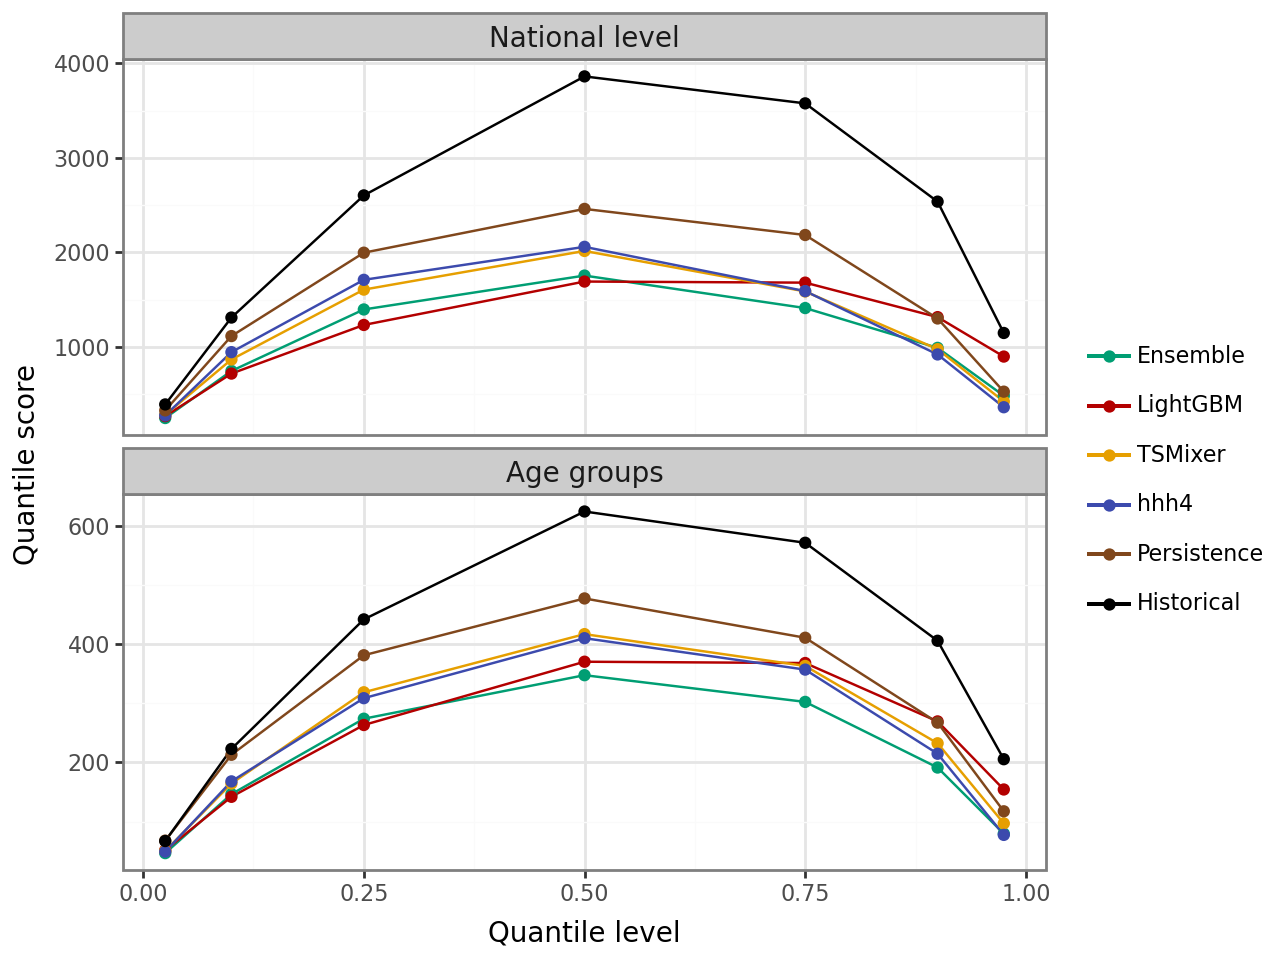

In [11]:
p = (ggplot(df_qs, aes(x='quantile', y='score', color='model'))
        + facet_wrap('level', nrow=2, scales='free_y', labeller=lambda x: ('National level' if x == 'national' else 'Age groups'))
        + geom_line()
        + geom_point()
        + scale_color_manual(values=MODEL_COLORS)
        + labs(x="Quantile level", y="Quantile score", color="", title="")
        #+ scale_x_continuous(breaks=QUANTILES, labels=QUANTILES)
        + theme_bw()
        + theme(
            legend_position='right',
            legend_title_position='top',
            legend_key=element_blank(),
                    
            plot_title=element_text(size=11),
            strip_text=element_text(size=10),
            legend_title=element_text(size=9),           
            legend_text=element_text(size=8),
            axis_title=element_text(size=10),
            axis_text_x=element_text(size=8),
            axis_text_y=element_text(size=8))
        )
p

In [12]:
p.save("../figures/qs.pdf", width = 160, height = 90, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 160.0 x 90.00000000000001 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/qs.pdf


# Coverage

In [13]:
df['covered'] = df.truth <= df.value

In [14]:
df_coverage = df[df.age_group == '00+'].groupby(['model', 'quantile'])['covered'].mean().reset_index()

In [15]:
df_coverage = df_coverage[df_coverage.model.isin(MAIN_MODELS)].copy()
model_order = [m for m in MODEL_ORDER if m in df_coverage.model.unique()]
df_coverage['model'] = pd.Categorical(df_coverage['model'], categories=model_order, ordered=True) 

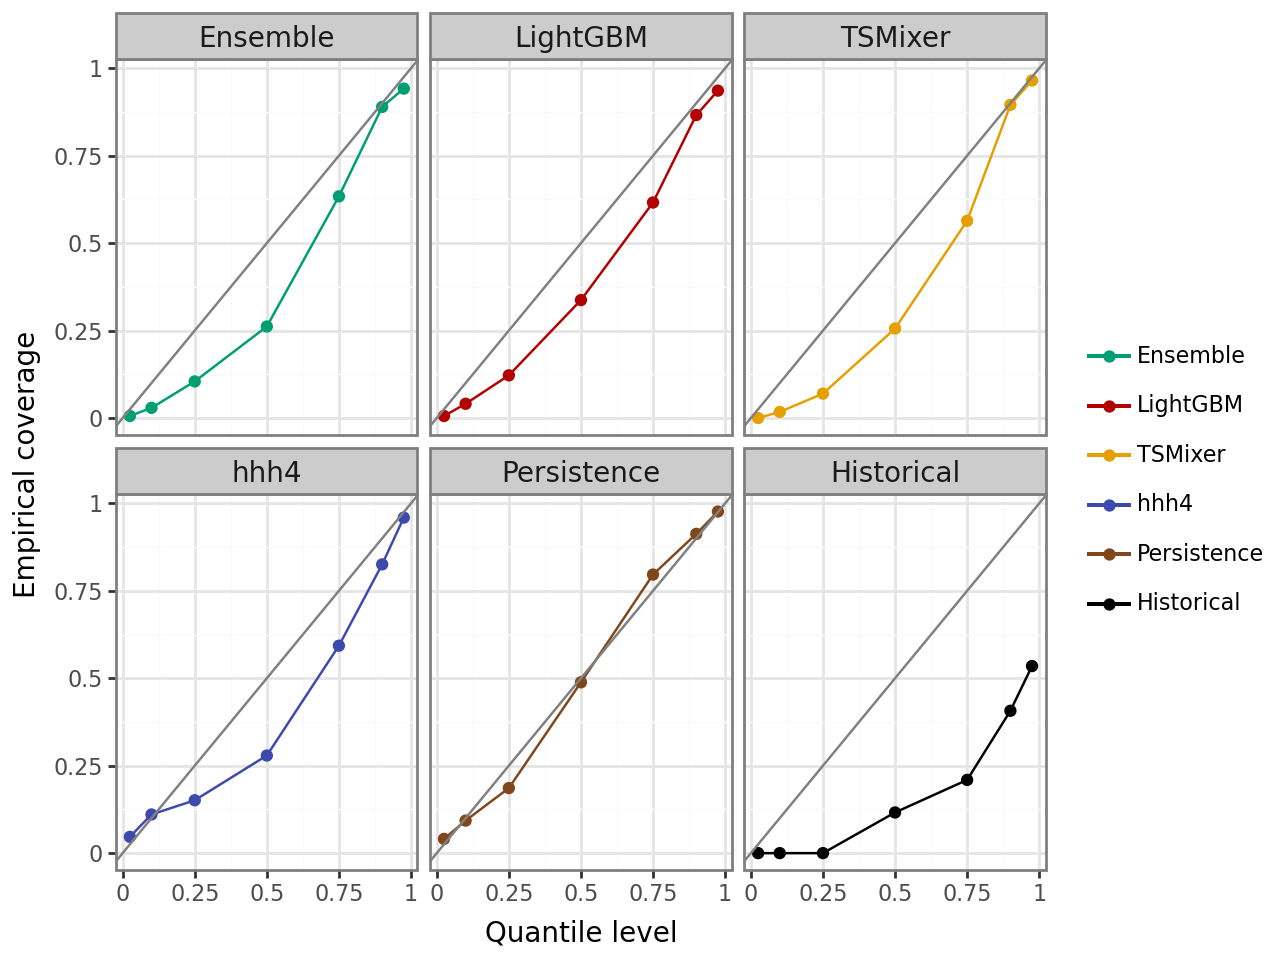

In [16]:
q = (ggplot(df_coverage, aes(x='quantile', y='covered', color='model'))
 + facet_wrap('model')
 + geom_line()
 + geom_point()
 + geom_abline(slope=1, intercept=0, linetype='solid', color='gray')
 + scale_color_manual(values=MODEL_COLORS)
 + labs(x = 'Quantile level', y='Empirical coverage', color='')
 + scale_x_continuous(labels=lambda l: [f'{int(v)}' if v == int(v) else f'{v}' for v in l])
 + scale_y_continuous(labels=lambda l: [f'{int(v)}' if v == int(v) else f'{v}' for v in l])
 + theme_bw()
 + theme(
     legend_position='right',
     legend_title_position='top',
     legend_key=element_blank(),

     plot_title=element_text(size=11),
     strip_text=element_text(size=10),
     legend_title=element_text(size=9),           
     legend_text=element_text(size=8),
     axis_title=element_text(size=10),
     axis_text_x=element_text(size=8),
     axis_text_y=element_text(size=8))
)
q

In [17]:
q.save("../figures/quantile_coverage.pdf", width = 160, height = 90, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 160.0 x 90.00000000000001 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/quantile_coverage.pdf
